In [1]:
import POIO as po
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib agg
import matplotlib.gridspec as gridspec
from astro import constants as c
import healpy as hp
from astropy.convolution import convolve, Gaussian1DKernel
import matplotlib as mpl
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
path_spectra = '/cral/mauerhofer/RascasFiles/sphinx/05_F1000/02_IC20_BP/00183/Halo7.3/spectra/SiII_1260/'
path_fesc = '/cral/mauerhofer/RascasFiles/sphinx/05_F1000/02_IC20_BP/00183/Halo7.3/fesc/'

line = 1260.42

In [3]:
nside = 10  #nDirections = 12 * nside^2
nvec = hp.nside2npix(nside)
directions = np.zeros((nvec,3))
for i in range (0,nvec) :
    directions[i,:] = hp.pix2vec(nside,i)

In [7]:
EW_abs = np.zeros(100)
EW_fluo = np.zeros(100)
v_center = np.zeros(100)
v90 = np.zeros(100)
res_flux = np.zeros(100)

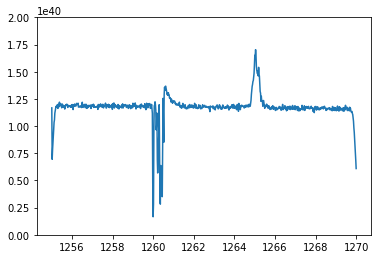

In [26]:
for idir in range(,64):
    a = po.mockobs(path_spectra,'output_fid.out','IC_photons.ic',load_spectrum=True,idirection=idir+1)
    spec_peeloff = a.spec
    l_peeloff = np.linspace(a.spec_lmin,a.spec_lmax,num=a.spec_npix)
    v_peeloff = (l_peeloff-line)/line*c.c_cgs*1e-5
    plt.plot(l_peeloff,spec_peeloff)
    plt.ylim(0.0,2e40)
    Fcont = np.average(spec_peeloff[np.where((l_peeloff>1257.5) & (l_peeloff<1258.5))])
    ratio = (Fcont - spec_peeloff)/Fcont
    EW_abs[idir] = np.trapz(ratio[(l_peeloff>1258)&(l_peeloff<1262)],l_peeloff[(l_peeloff>1258)&(l_peeloff<1262)])
    EW_fluo[idir] = np.trapz(ratio[(l_peeloff>1263)&(l_peeloff<1267)],l_peeloff[(l_peeloff>1263)&(l_peeloff<1267)])
    
    min_index = np.argmin(spec_peeloff[(l_peeloff>1258)&(l_peeloff<1263)])
    v_center[idir] = v_peeloff[(l_peeloff>1258)&(l_peeloff<1263)][min_index]
    res_flux[idir] = spec_peeloff[(l_peeloff>1258)&(l_peeloff<1263)][min_index]/Fcont
    


In [14]:
print(np.min(EW_abs), np.max(EW_abs), np.mean(EW_abs))
print(np.min(EW_fluo), np.max(EW_fluo), np.mean(EW_fluo))

0.024263419696485315 0.5708618339555113 0.19854817885911072
-0.26265537457670973 -0.08118581992070993 -0.09966802797753489


In [17]:
fesc = np.genfromtxt('%s/output_fesc_1200.dat'%path_fesc,unpack=True,skip_header=2)
fesc_new = np.zeros(100)
directions_new = np.zeros((100,3))
print(np.mean(fesc),fesc.size)
#print(np.min(fesc),np.max(fesc))
print()
for i in range(10):
    indices = np.where((fesc<(i+1)*np.max(fesc)/10)&(fesc>(i)*np.max(fesc)/10))[0]
    fesc_new[10*i:10*(i+1)] = fesc[indices][0:10]
    directions_new[10*i:10*(i+1),:] = directions[indices[0:10],:]

0.27838969598332375 1200



In [62]:
# f = open('%s/params_mock_sample.dat'%path_fesc,'w')

# for i in range(100):
#     f.write('%07.5f %07.5f %07.5f \n'%(directions_new[i,0],directions_new[i,1],directions_new[i,2]))
#     f.write('%07.5f, %07.5f, %07.5f \n'%(0.09521714, 0.121403486, 0.061879665))
#     f.write('0.0 \n')
#     f.write('%i %07.5f %6.1f %6.1f \n'%(800., 0.0055, 1255, 1270))
#     f.write('0 0.0 \n')
#     f.write('0 0 0 0 0. \n')
#     f.write('\n')
# f.close()

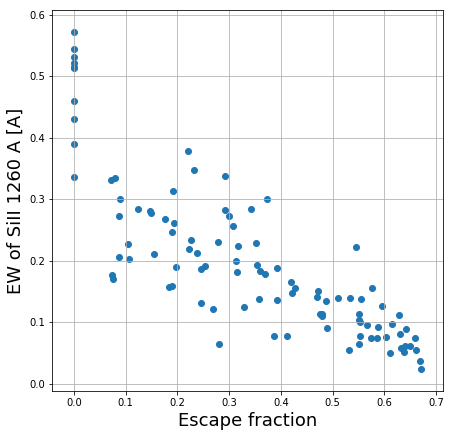

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(fesc_new,EW_abs)
plt.xlabel('Escape fraction',fontsize=18)
plt.ylabel('EW of SiII 1260 A [A]',fontsize=18)
plt.grid()
plt.show()

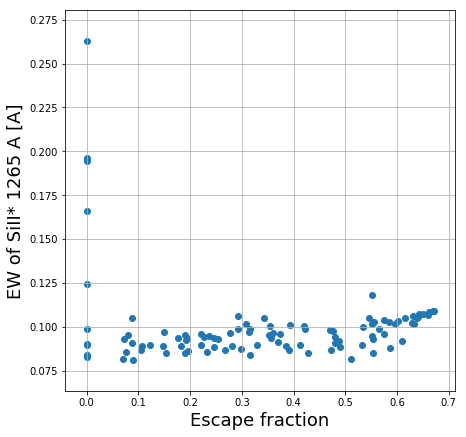

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(fesc_new,-EW_fluo)
plt.xlabel('Escape fraction',fontsize=18)
plt.ylabel('EW of SiII* 1265 A [A]',fontsize=18)
plt.grid()
plt.show()

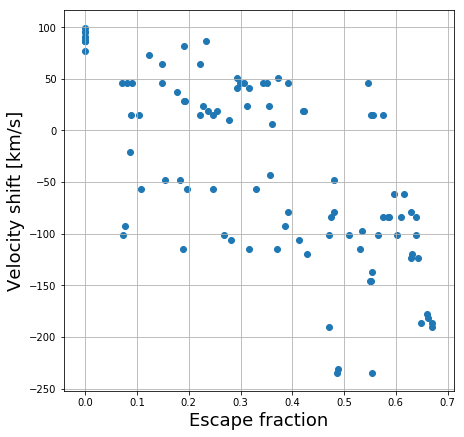

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(fesc_new,v_center)
plt.xlabel('Escape fraction',fontsize=18)
plt.ylabel('Velocity shift [km/s]',fontsize=18)
plt.grid()
plt.show()

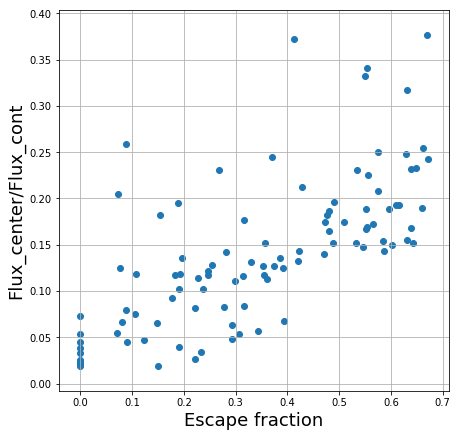

In [21]:
plt.figure(figsize=(7,7))
plt.scatter(fesc_new,res_flux)
plt.xlabel('Escape fraction',fontsize=18)
plt.ylabel('Flux_center/Flux_cont',fontsize=18)
plt.grid()
plt.show()